# Linear Regression Case Study


Steps for Regression Modeling:
1. Business problem definition - One of the global bank would like to understandwhat factors are driving credit card spend are. The bank wants to use these insights tocalculate credit limit. In order to solve the problem, the bank conducted survey of 5000 customers and collected data. The objective of this case study is to understand what's driving the total spend(Primary+Secondary card). Given the factors predict credit limit for the new applicants. 
2. convert business problem into statistical problem  sales = F(sales attributes, product features, marketing info etc.)
3. Finding the right technique -OLS
4. Data colletion(Y, X) 
5. Consolidate the data - aggregate and consolidate the data at customer level
6. Data preparation for modeling (create data audit report)
    a. missing value treatment
    b. outlier treatment
    c. dummy variable creation
7. Variable creation by using transformation and derived variable creation.
8. Basic assumptions (Normality, linearity, no outliers, homoscadasticity, no pattern in residuals, no auto correlation etc)
9. Variable reduction techniques (removing multicollinerity with the help of FA/PCA, correlation matrics, VIF)
10. Create dev and validation data sets
11. Modeling on dev data set (identify significant variables, model interpretation, check the signs and coefficients, multi-collinierity check, measures of good neess fit, final mathematical equation etc)
12. validating on validation data  set (check the stability of model, scoring, decile analysis, cross validation etc.)
13. Output interpretation and derive insights (understand the limitations of the model and define strategy to implementation)
14. convert statistical solution into business solutions (implementation, model monitoring etc)


# Importing Libraries & Dataset

In [104]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling   
%pylab inline
plt.rcParams['figure.figsize'] = 11.7, 8.27
plt.rcParams['axes.grid'] = True
plt.gray()

Populating the interactive namespace from numpy and matplotlib


<Figure size 842.4x595.44 with 0 Axes>

In [105]:
credit = pd.read_csv('CREDIT CARD USERS DATA.csv')

In [106]:
credit.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,...,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,...,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4.0,1,67,6,June,14,2,2,...,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3.0,0,23,2,May,16,3,2,...,1,0,1,1,1,0,1,1,0,0
4,8158-SMTQFB-CNO,2,2.0,0,26,3,July,16,3,2,...,1,0,1,0,1,0,0,0,1,0


In [107]:
miss = credit.apply(lambda x: x.isnull().sum())


In [108]:
miss.to_csv('miss.csv')

# Dropping insignificant variables  by analysing the dataset

In [109]:
credit = credit.drop(['custid', 'ed', 'employ', 'income','birthmonth', 'lninc', 'commute', 'address', 'commutemotorcycle', 'commutecar', 'commutecarpool', 'commutebus', 'commuterail', 'commutepublic', 'commutebike', 'commutewalk', 'commutenonmotor', 'telecommute', 'cardtenure', 'card2tenure', 'lntollmon', 'lntollten', 'lnequipmon', 'lnequipten', 'lncardmon', 'lncardten', 'lnwiremon', 'lnwireten', 'age', 'lncreddebt', 'lnothdebt', 'lnlongmon', 'lnlongten', 'carvalue'], axis=1)

# Separating numerical and categorical variables

In [110]:
num_var = ['debtinc', 'creddebt', 'othdebt', 'pets', 'carditems', 'commutetime', 'hourstv',
           'cardspent', 'card2items', 'card2spent', 'tenure', 'longmon', 'longten', 'tollmon', 'tollten', 'equipmon',
           'equipten', 'cardmon', 'cardten', 'wiremon', 'wireten', 'pets_cats', 'pets_dogs', 'pets_birds', 'pets_reptiles',
           'pets_small', 'pets_saltfish', 'pets_freshfish']

In [111]:
cat_var = credit.columns.difference(num_var)

In [112]:
credit_num = credit[num_var]
credit_cat = credit[cat_var]

In [113]:
credit_num.head()

,debtinc,creddebt,othdebt,pets,carditems,commutetime,hourstv,cardspent,card2items,card2spent,...,cardten,wiremon,wireten,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish
0,11.1,1.20,2.24,0,5,22.0,13,81.66,4,67.80,...,60.0,0.00,0.00,0,0,0,0,0,0,0
1,18.6,1.22,1.57,6,5,29.0,18,42.60,2,34.94,...,610.0,45.65,1683.55,0,0,0,0,0,0,6
2,9.9,0.93,2.54,3,9,24.0,21,184.22,7,175.75,...,1410.0,0.00,0.00,2,1,0,0,0,0,0
3,5.7,0.02,1.12,0,17,38.0,26,340.99,1,18.42,...,685.0,0.00,0.00,0,0,0,0,0,0,0
4,1.7,0.21,0.18,0,8,32.0,27,255.10,7,252.73,...,360.0,19.05,410.80,0,0,0,0,0,0,0


In [114]:
#Handling Missings for categorical
# Fill with mode
credit_cat['townsize']=credit_cat['townsize'].fillna(1)

C:\Users\sony\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [115]:
# Mapping cars and commutetime variable to make them categorical

credit_cat['cars'] = pd.cut(credit_cat['cars'], bins=[-1, 2, 5, 8], labels=['0-2', '3-5', '6-8'])
credit_cat['reside'] = pd.cut(credit_cat['reside'], bins=[0, 3, 6, 10], labels=['1-3', '4-6', '7-9'])

C:\Users\sony\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sony\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [116]:
for i in cat_var:
    credit_cat[i]=credit_cat[i].astype('object')

C:\Users\sony\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [117]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=credit_num.apply(lambda x: var_summary(x)).T

In [118]:
num_summary.head()

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
debtinc,5000.0,0.0,49770.80,9.954160,8.80,6.399783,40.957226,0.0,0.70,1.90,2.80,5.10,8.80,13.60,18.60,22.2000,29.2000,43.10
creddebt,5000.0,0.0,9286.82,1.857364,0.93,3.415789,11.667616,0.0,0.03,0.10,0.18,0.39,0.93,2.06,4.30,6.3715,14.2804,109.07
othdebt,5000.0,0.0,18272.28,3.654456,2.10,5.395214,29.108331,0.0,0.11,0.29,0.46,0.98,2.10,4.31,8.06,11.8120,24.0618,141.46
pets,5000.0,0.0,15337.00,3.067400,2.00,3.414497,11.658789,0.0,0.00,0.00,0.00,0.00,2.00,5.00,8.00,10.0000,13.0000,21.00
carditems,5000.0,0.0,50887.00,10.177400,10.00,3.391140,11.499829,0.0,2.00,5.00,6.00,8.00,10.00,12.00,15.00,16.0000,19.0000,23.00


In [119]:
# Treating Outliers

In [120]:
#Handling Outliers - Method2
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

credit_num=credit_num.apply(lambda x: outlier_capping(x))

In [121]:
num_summary=credit_num.apply(lambda x: var_summary(x)).T
num_summary.head(3)

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
debtinc,5000.0,0.0,49570.60,9.914120,8.80,6.241691,38.958700,0.70,0.70,1.90,2.80,5.10,8.80,13.60,18.60,22.2000,29.200000,29.2000
creddebt,5000.0,0.0,8791.86,1.758372,0.93,2.380783,5.668128,0.03,0.03,0.10,0.18,0.39,0.93,2.06,4.30,6.3715,14.280004,14.2804
othdebt,5000.0,0.0,17612.16,3.522432,2.10,4.221718,17.822902,0.11,0.11,0.29,0.46,0.98,2.10,4.31,8.06,11.8120,24.060018,24.0618


In [122]:
#Treating missing values in longten and cardten

#Handling Missings
# Fill with mean

#Handling missings - Method2
def Missing_imputation(x):
    x = x.fillna(x.mean())
    return x

credit_num=credit_num.apply(lambda x: Missing_imputation(x))

In [123]:
num_summary=credit_num.apply(lambda x: var_summary(x)).T
num_summary.N[['longten', 'cardten', 'commutetime']]

longten        5000.0
cardten        5000.0
commutetime    5000.0
Name: N, dtype: float64

In [124]:
#No missing values in numerical variables

In [125]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=credit_cat.apply(lambda x: cat_summary(x))

In [126]:
cat_summary.T

,N,NMISS,ColumnsNames
active,5000,0,"0 2670 1 2330 Name: active, dtype: int64"
addresscat,5000,0,3 1221 5 1157 4 1139 2 873 1 ...
agecat,5000,0,4 1222 5 1195 6 1068 3 893 2 ...
bfast,5000,0,"3 1875 1 1582 2 1543 Name: bfast, dty..."
callcard,5000,0,"1 3581 0 1419 Name: callcard, dtype: int64"
callid,5000,0,"0 2624 1 2376 Name: callid, dtype: int64"
callwait,5000,0,"0 2605 1 2395 Name: callwait, dtype: int64"
carbought,5000,0,0 2901 1 1602 -1 497 Name: carboug...
carbuy,5000,0,"0 3195 1 1805 Name: carbuy, dtype: int64"
carcatvalue,5000,0,1 2399 2 1267 3 837 -1 497 Na...


# Modify some categorical and numerical variables

In [127]:
# Make a new var Total_cardspent which is sum of primary card spend and secondary card spend
credit_num['Total_cardspent'] = credit_num['cardspent'] + credit_num['card2spent']

# Make a new var Total_carditems which is sum of primary card spend items and secondary card spend items
credit_num['Total_carditems'] = credit_num['carditems'] + credit_num['card2items']

In [128]:
credit_num.drop(['carditems', 'cardspent', 'card2items', 'card2spent'], inplace=True, axis=1)

In [129]:
credit_cat.gender = credit_cat.gender.map({0:'Male', 1:'Female'})

In [130]:

#credit = pd.concat([credit_num, credit_cat], axis=1)

# Create dummies for categorical variable

In [131]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [132]:
#for c_feature in categorical_features

for c_feature in cat_var:
    credit_cat[c_feature] = credit_cat[c_feature].astype('category')
    credit_cat = create_dummies(credit_cat , c_feature )

C:\Users\sony\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [133]:
credit_cat.head(3)

,active_1,addresscat_2,addresscat_3,addresscat_4,addresscat_5,agecat_3,agecat_4,agecat_5,agecat_6,bfast_2,...,spousedcat_5,tollfree_1,townsize_2.0,townsize_3.0,townsize_4.0,townsize_5.0,union_1,voice_1,vote_1,wireless_1
0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,1,1,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


# Concat both num and categor datasets

In [134]:

credit_new = pd.concat([credit_num, credit_cat], axis=1)

In [135]:
credit_new.head(2)

,debtinc,creddebt,othdebt,pets,commutetime,hourstv,tenure,longmon,longten,tollmon,...,spousedcat_5,tollfree_1,townsize_2.0,townsize_3.0,townsize_4.0,townsize_5.0,union_1,voice_1,vote_1,wireless_1
0,11.1,1.20,2.24,0.0,22.0,13.0,5.0,6.5,34.4,29.0,...,0,1,1,0,0,0,1,1,1,0
1,18.6,1.22,1.57,6.0,29.0,18.0,39.0,8.9,330.6,0.0,...,0,0,0,0,0,1,0,1,0,1


C:\Users\sony\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


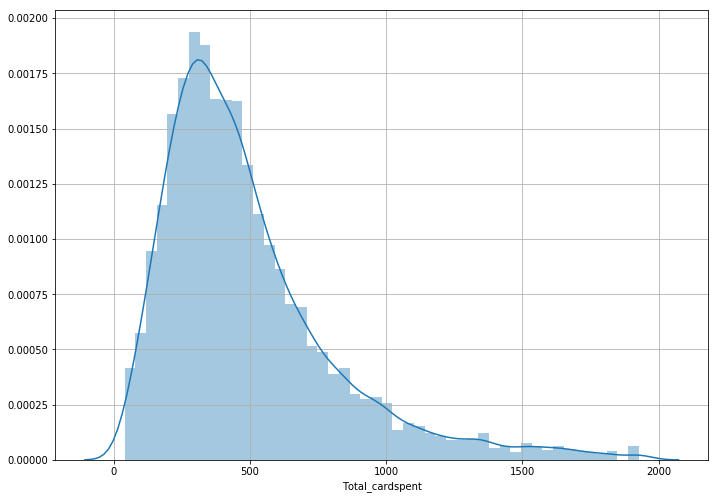

In [136]:
# exploring data
# Distribution of variables
import seaborn as sns
sns.distplot(credit_new.Total_cardspent)

In [137]:
credit_new["ln_Total_cardspent"]= np.log(credit_new["Total_cardspent"]+1)

C:\Users\sony\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


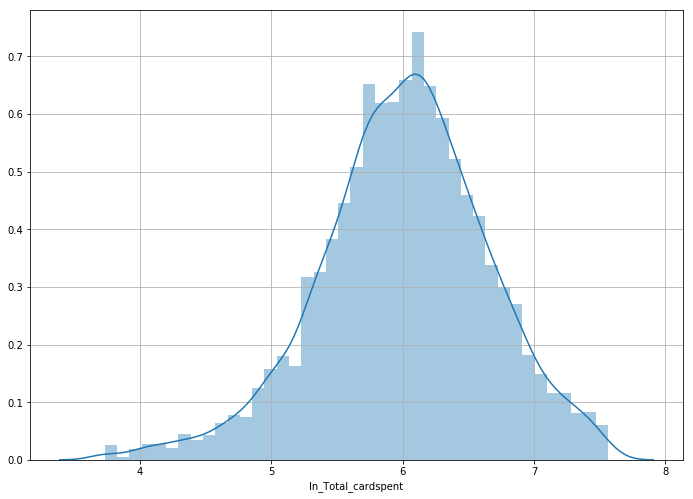

In [138]:
sns.distplot(credit_new.ln_Total_cardspent)

In [139]:
#Dropping the variables
credit_new=credit_new.drop(['Total_cardspent'],axis=1)

In [140]:
credit_new.corr()

,debtinc,creddebt,othdebt,pets,commutetime,hourstv,tenure,longmon,longten,tollmon,...,tollfree_1,townsize_2.0,townsize_3.0,townsize_4.0,townsize_5.0,union_1,voice_1,vote_1,wireless_1,ln_Total_cardspent
debtinc,1.000000,0.462596,0.526983,-0.002531,0.000729,-0.011577,0.018607,0.012266,0.014531,-0.008189,...,-0.021065,0.001024,-0.025456,-0.024481,1.313974e-02,-0.004927,-0.000223,-0.008310,-0.002080,0.015708
creddebt,0.462596,1.000000,0.640411,-0.009970,-0.013474,0.032731,0.149677,0.124067,0.128345,0.134850,...,0.077535,0.015607,-0.015848,-0.021487,-1.802927e-02,0.000943,0.074360,0.097587,0.085916,0.233055
othdebt,0.526983,0.640411,1.000000,0.011678,-0.013566,0.035480,0.181639,0.141466,0.147408,0.168206,...,0.102146,0.012198,-0.011450,-0.022742,6.114042e-03,-0.007106,0.091921,0.072284,0.118376,0.260740
pets,-0.002531,-0.009970,0.011678,1.000000,0.007647,0.019436,0.033579,0.025222,0.028851,0.003462,...,-0.015058,0.005050,-0.007686,-0.002877,3.025485e-03,0.023959,0.011229,0.001263,0.004830,-0.005172
commutetime,0.000729,-0.013474,-0.013566,0.007647,1.000000,0.004958,-0.019203,-0.001004,-0.004131,-0.040032,...,-0.033331,-0.092234,0.044623,0.190877,3.371734e-01,-0.004832,-0.019175,0.000257,0.001902,0.005060
hourstv,-0.011577,0.032731,0.035480,0.019436,0.004958,1.000000,0.027339,0.014974,0.009998,0.017787,...,0.002891,-0.010528,0.019232,-0.031622,1.598145e-02,-0.008694,-0.007337,-0.004605,0.002278,0.044308
tenure,0.018607,0.149677,0.181639,0.033579,-0.019203,0.027339,1.000000,0.716183,0.758000,0.191747,...,0.011710,0.008777,-0.012605,-0.024570,-5.662024e-03,0.003615,-0.041394,-0.001484,-0.050233,0.051746
longmon,0.012266,0.124067,0.141466,0.025222,-0.001004,0.014974,0.716183,1.000000,0.982820,0.156409,...,-0.004321,0.009956,-0.006748,-0.010714,-7.437410e-03,0.021776,-0.048636,0.006991,-0.045230,0.035471
longten,0.014531,0.128345,0.147408,0.028851,-0.004131,0.009998,0.758000,0.982820,1.000000,0.159246,...,-0.008252,0.010342,-0.003200,-0.013898,-1.165485e-02,0.021265,-0.051996,0.002439,-0.052533,0.035077
tollmon,-0.008189,0.134850,0.168206,0.003462,-0.040032,0.017787,0.191747,0.156409,0.159246,1.000000,...,0.872731,0.018399,-0.002397,-0.001864,-1.861915e-02,0.019444,0.387079,0.023001,0.405862,0.073757


In [141]:
#Splitting the data

feature_columns = credit_new.columns.difference( ['ln_Total_cardspent'] )
feature_columns

Index([u'Total_carditems', u'active_1', u'addresscat_2', u'addresscat_3',
       u'addresscat_4', u'addresscat_5', u'agecat_3', u'agecat_4', u'agecat_5',
       u'agecat_6',
       ...
       u'townsize_2.0', u'townsize_3.0', u'townsize_4.0', u'townsize_5.0',
       u'union_1', u'voice_1', u'vote_1', u'wireless_1', u'wiremon',
       u'wireten'],
      dtype='object', length=191)

In [142]:
from sklearn.cross_validation import train_test_split

train_X, test_X, train_y, test_y = train_test_split( credit_new[feature_columns],
                                                  credit_new['ln_Total_cardspent'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [143]:
print len( train_X )
print len( test_X)

3500
1500


In [144]:
import statsmodels.api as sm

In [145]:
train_X = sm.add_constant(train_X)
lm=sm.OLS(train_y,train_X).fit()

In [146]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ln_Total_cardspent   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     44.66
Date:                Mon, 01 Oct 2018   Prob (F-statistic):               0.00
Time:                        18:47:49   Log-Likelihood:                -1311.8
No. Observations:                3500   AIC:                             2990.
Df Residuals:                    3317   BIC:                             4117.
Df Model:                         182                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                4.9238      0.100     49.217      0.000       4.728       5.120
Total_carditems      0.0903      0.001     62.710      0.000       0.087       0.093
active_1            -0.0098      0.013     -0.739      0.460      -0.036       0.016
addresscat_2         0.0056      0.033      0.171      0.864      -0.059       0.070
addresscat_3        -0.0149      0.038     -0.394      0.694      -0.089       0.059
addresscat_4        -0.0280      0.041     -0.677      0.498      -0.109       0.053
addresscat_5        -0.0357      0.044     -0.807      0.420      -0.122       0.051
agecat_3             0.0681      0.036      1.866      0.062      -0.003       0.140
agecat_4             0.0666      0.044      1.501      0.133      -0.020       0.154
agecat_5             0.0977      0.049      1.981      0.048       0.001       0.194
agecat_6             0.0957      0.054      1.761      0.078      -0.011       0.202
bfast_2             -0.0175      0.020     -0.893      0.372      -0.056       0.021
bfast_3              0.0067      0.016      0.423      0.672      -0.024       0.038
callcard_1          -0.0196      0.023     -0.839      0.402      -0.065       0.026
callid_1             0.0003      0.019      0.017      0.986      -0.036       0.037
callwait_1          -0.0002      0.018     -0.013      0.989      -0.036       0.036
carbought_0         -0.0050      0.009     -0.530      0.596      -0.023       0.013
carbought_1          0.0119      0.010      1.166      0.244      -0.008       0.032
carbuy_1             0.0098      0.014      0.722      0.470      -0.017       0.036
carcatvalue_1       -0.0217      0.016     -1.393      0.164      -0.052       0.009
carcatvalue_2       -0.0054      0.013     -0.400      0.689      -0.032       0.021
carcatvalue_3        0.0340      0.022      1.571      0.116      -0.008       0.076
card2_2             -0.2591      0.021    -12.585      0.000      -0.300      -0.219
card2_3             -0.2628      0.020    -12.862      0.000      -0.303      -0.223
card2_4             -0.2991      0.022    -13.324      0.000      -0.343      -0.255
card2_5             -0.2276      0.029     -7.738      0.000      -0.285      -0.170
card2benefit_2       0.0243      0.018      1.354      0.176      -0.011       0.059
card2benefit_3      -0.0127      0.018     -0.711      0.477      -0.048       0.022
card2benefit_4       0.0070      0.018      0.393      0.694      -0.028       0.042
card2fee_1           0.0062      0.016      0.388      0.698      -0.025       0.038
card2tenurecat_2    -0.0027      0.043     -0.064      0.949      -0.086       0.081
card2tenurecat_3     0.0228      0.052      0.438      0.661      -0.079       0.125
card2tenurecat_4     0.0232      0.058      0.399      0.690      -0.091       0.138
card2tenurecat_5     0.

In [147]:
test_X = sm.add_constant(test_X)
y_pred = lm.predict(test_X)
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print 'MAE:', metrics.mean_absolute_error(test_y, y_pred)
print 'MSE:', metrics.mean_squared_error(test_y, y_pred)
print 'RMSE:', np.sqrt(metrics.mean_squared_error(test_y, y_pred))

MAE: 0.2884219705557409
MSE: 0.13355977642961106
RMSE: 0.36545831011157903


In [148]:
# Check VIF

In [149]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [150]:
all_columns = "+".join(credit_num.columns.difference( ['Total_cardspent'] ))

my_formula = "ln_Total_cardspent~" + all_columns

print my_formula

ln_Total_cardspent~Total_carditems+cardmon+cardten+commutetime+creddebt+debtinc+equipmon+equipten+hourstv+longmon+longten+othdebt+pets+pets_birds+pets_cats+pets_dogs+pets_freshfish+pets_reptiles+pets_saltfish+pets_small+tenure+tollmon+tollten+wiremon+wireten


In [151]:
%%capture
#gather features
#features = "+".join(car_sales.columns - ["Sales_in_thousands"])

# get y and X dataframes based on this regression
y, X = dmatrices('ln_Total_cardspent~Total_carditems+cardmon+cardten+commutetime+creddebt+debtinc+equipmon+equipten+hourstv+longmon+longten+othdebt+pets+tenure+tollmon+tollten+wiremon+wireten', credit_new, return_type='dataframe')

In [152]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [153]:
vif[vif["VIF Factor"]>10]

,VIF Factor,features
0,62.079802,Intercept
3,10.427288,cardten
10,32.606287,longmon
11,38.864424,longten
15,10.064928,tollmon
16,11.529964,tollten
17,10.717780,wiremon
18,10.855500,wireten


In [154]:
# Drop variables on basis of VIF

In [155]:
credit_new = credit_new.drop(['cardten', 'longmon', 'longten', 'tollmon', 'tollten', 'wiremon', 'wireten'], axis=1)

In [156]:
#Splitting the data

feature_columns = credit_new.columns.difference( ['ln_Total_cardspent'] )
feature_columns

Index([u'Total_carditems', u'active_1', u'addresscat_2', u'addresscat_3',
       u'addresscat_4', u'addresscat_5', u'agecat_3', u'agecat_4', u'agecat_5',
       u'agecat_6',
       ...
       u'tenure', u'tollfree_1', u'townsize_2.0', u'townsize_3.0',
       u'townsize_4.0', u'townsize_5.0', u'union_1', u'voice_1', u'vote_1',
       u'wireless_1'],
      dtype='object', length=184)

In [157]:
from sklearn.cross_validation import train_test_split

train_X, test_X, train_y, test_y = train_test_split( credit_new[feature_columns],
                                                  credit_new['ln_Total_cardspent'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [158]:
train_X = sm.add_constant(train_X)
lm=sm.OLS(train_y,train_X).fit()

In [159]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ln_Total_cardspent   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     46.36
Date:                Mon, 01 Oct 2018   Prob (F-statistic):               0.00
Time:                        18:47:53   Log-Likelihood:                -1316.8
No. Observations:                3500   AIC:                             2986.
Df Residuals:                    3324   BIC:                             4070.
Df Model:                         175                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                4.8917      0.098     49.735      0.000       4.699       5.085
Total_carditems      0.0904      0.001     62.754      0.000       0.088       0.093
active_1            -0.0087      0.013     -0.655      0.512      -0.035       0.017
addresscat_2         0.0082      0.033      0.248      0.804      -0.056       0.073
addresscat_3        -0.0138      0.038     -0.363      0.716      -0.088       0.061
addresscat_4        -0.0263      0.041     -0.638      0.524      -0.107       0.055
addresscat_5        -0.0318      0.044     -0.720      0.471      -0.118       0.055
agecat_3             0.0763      0.036      2.109      0.035       0.005       0.147
agecat_4             0.0749      0.044      1.698      0.090      -0.012       0.161
agecat_5             0.1042      0.049      2.118      0.034       0.008       0.201
agecat_6             0.1027      0.054      1.896      0.058      -0.003       0.209
bfast_2             -0.0188      0.020     -0.961      0.336      -0.057       0.020
bfast_3              0.0052      0.016      0.328      0.743      -0.026       0.036
callcard_1          -0.0402      0.021     -1.934      0.053      -0.081       0.001
callid_1            -0.0004      0.019     -0.023      0.982      -0.037       0.036
callwait_1          -0.0023      0.018     -0.124      0.901      -0.038       0.034
carbought_0         -0.0051      0.009     -0.540      0.589      -0.023       0.013
carbought_1          0.0112      0.010      1.100      0.271      -0.009       0.031
carbuy_1             0.0089      0.014      0.656      0.512      -0.018       0.036
carcatvalue_1       -0.0199      0.016     -1.277      0.202      -0.050       0.011
carcatvalue_2       -0.0062      0.013     -0.466      0.642      -0.033       0.020
carcatvalue_3        0.0323      0.022      1.493      0.136      -0.010       0.075
card2_2             -0.2587      0.021    -12.571      0.000      -0.299      -0.218
card2_3             -0.2630      0.020    -12.885      0.000      -0.303      -0.223
card2_4             -0.3009      0.022    -13.407      0.000      -0.345      -0.257
card2_5             -0.2263      0.029     -7.695      0.000      -0.284      -0.169
card2benefit_2       0.0263      0.018      1.470      0.142      -0.009       0.061
card2benefit_3      -0.0124      0.018     -0.696      0.487      -0.047       0.022
card2benefit_4       0.0091      0.018      0.514      0.608      -0.026       0.044
card2fee_1           0.0057      0.016      0.357      0.721      -0.026       0.037
card2tenurecat_2    -0.0036      0.043     -0.084      0.933      -0.087       0.080
card2tenurecat_3     0.0126      0.052      0.245      0.807      -0.088       0.114
card2tenurecat_4     0.0109      0.058      0.188      0.851      -0.102       0.124
card2tenurecat_5     0.

In [160]:
test_X = sm.add_constant(test_X)
y_pred = lm.predict(test_X)
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print 'MAE:', metrics.mean_absolute_error(test_y, y_pred)
print 'MSE:', metrics.mean_squared_error(test_y, y_pred)
print 'RMSE:', np.sqrt(metrics.mean_squared_error(test_y, y_pred))

MAE: 0.2875060286942333
MSE: 0.1331710858332736
RMSE: 0.36492613750356884


In [161]:
residuals = test_y - y_pred

C:\Users\sony\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\sony\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


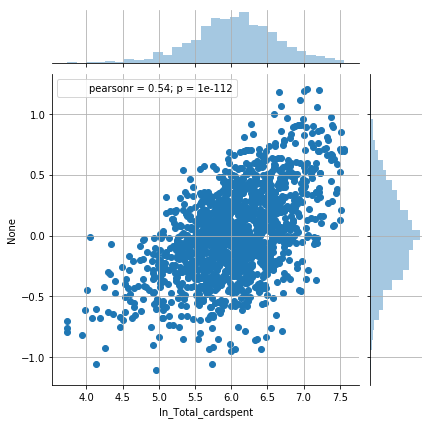

In [162]:
sns.jointplot(  test_y, residuals )

C:\Users\sony\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


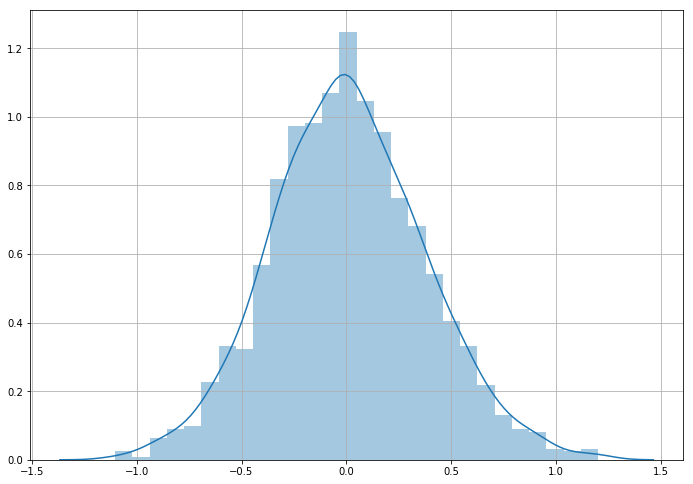

In [163]:
sns.distplot( residuals )

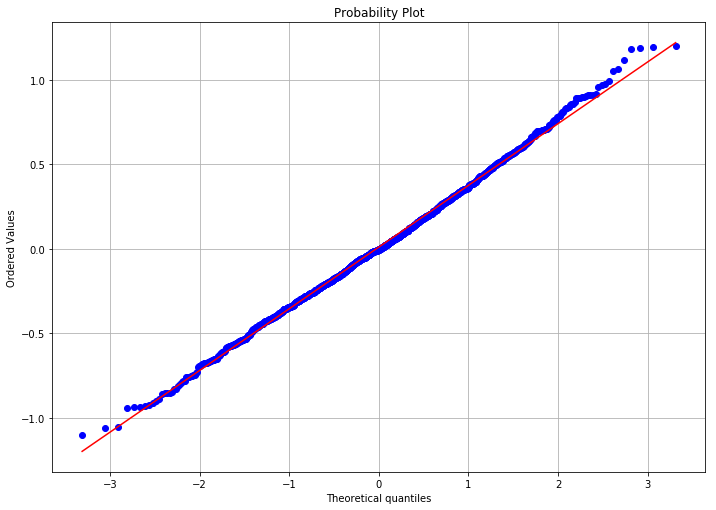

In [164]:
# To ensure residues are random i.e. normally distributed a Q-Q plot can be used
# Q-Q plot shows if the residuals are plotted along the line.
from scipy import stats
import pylab

stats.probplot( residuals, dist="norm", plot=pylab )
pylab.show()

In [165]:
# Feature Selection based on importance
from sklearn.feature_selection import f_regression

In [166]:
from sklearn.feature_selection import SelectKBest, f_classif
#Suppose, we select 5 features with top 5 Fisher scores
selector = SelectKBest(f_classif, k = 40)
#New dataframe with the selected features for later use in the classifier. fit() method works too, if you want only the feature names and their corresponding scores
X_new = selector.fit_transform(train_X, train_y)
names = train_X.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

          Feat_names  F_Scores
27        spoused_21       inf
28        spoused_23       inf
29        spoused_24       inf
30         spoused_3       inf
31         spoused_5       inf
32         spoused_6       inf
33         spoused_9       inf
24        spoused_14  3.669676
6       commutecat_2  2.419467
0    Total_carditems  2.317118
23        spoused_13  2.196260
25        spoused_19  2.151215
14        internet_3  1.939542
26        spoused_20  1.920703
35      spousedcat_5  1.898214
19          reason_2  1.847194
4    cardtenurecat_2  1.830202
22     response_03_1  1.635725
34      spousedcat_2  1.585233
13        internet_2  1.511306
37      townsize_3.0  1.497490
5            churn_1  1.449934
10           edcat_5  1.439531
18     pets_saltfish  1.425871
21     response_02_1  1.414023
17          ownpda_1  1.376073
3            cardmon  1.371385
15          jobsat_4  1.347658
2   card2tenurecat_2  1.337558
36      townsize_2.0  1.336563
38           voice_1  1.301843
9       

C:\Users\sony\Anaconda2\lib\site-packages\sklearn\feature_selection\univariate_selection.py:113: UserWarning: Features [  0 160 162 163 164 165 166 169] are constant.
  UserWarning)


In [167]:
num_var1 = ['tenure', 'creddebt', 'othdebt', 'equipten'] 

In [168]:
cat_var1 = ['internet', 'reason', 'empcat', 'owncd', 'addresscat', 'inccat', 'agecat', 'edcat', 'townsize', 'jobsat', 'jobcat', 'retire', 'ownpda', 'carcatvalue', 'card2', 'card', 'polview', 'hometype']

In [169]:
credit_num1 = credit_new[num_var1]
credit_cat1 = credit[cat_var1]

In [170]:
credit_num1['ln_Total_cardspent'] = credit_new["ln_Total_cardspent"]


credit_num1['Total_carditems'] = credit_num['Total_carditems']

C:\Users\sony\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\sony\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [171]:
#for c_feature in categorical_features

for c_feat in cat_var1:
    credit_cat1[c_feat] = credit_cat1[c_feat].astype('category')
    credit_cat1 = create_dummies(credit_cat1 , c_feat )

C:\Users\sony\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [172]:
credit_nd = pd.concat([credit_num1, credit_cat1], axis=1)

In [173]:
#Splitting the data

feature_columns1 = credit_nd.columns.difference( ['ln_Total_cardspent'] )
feature_columns1

Index([u'Total_carditems', u'addresscat_2', u'addresscat_3', u'addresscat_4',
       u'addresscat_5', u'agecat_3', u'agecat_4', u'agecat_5', u'agecat_6',
       u'carcatvalue_1', u'carcatvalue_2', u'carcatvalue_3', u'card2_2',
       u'card2_3', u'card2_4', u'card2_5', u'card_2', u'card_3', u'card_4',
       u'card_5', u'creddebt', u'edcat_2', u'edcat_3', u'edcat_4', u'edcat_5',
       u'empcat_2', u'empcat_3', u'empcat_4', u'empcat_5', u'equipten',
       u'hometype_2', u'hometype_3', u'hometype_4', u'inccat_2', u'inccat_3',
       u'inccat_4', u'inccat_5', u'internet_1', u'internet_2', u'internet_3',
       u'internet_4', u'jobcat_2', u'jobcat_3', u'jobcat_4', u'jobcat_5',
       u'jobcat_6', u'jobsat_2', u'jobsat_3', u'jobsat_4', u'jobsat_5',
       u'othdebt', u'owncd_1', u'ownpda_1', u'polview_2', u'polview_3',
       u'polview_4', u'polview_5', u'polview_6', u'polview_7', u'reason_2',
       u'reason_3', u'reason_4', u'reason_9', u'retire_1', u'tenure',
       u'townsize_2.0', u'

In [174]:

train_X2, test_X2, train_y2, test_y2 = train_test_split( credit_nd[feature_columns1],
                                                  credit_nd['ln_Total_cardspent'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

In [175]:
train_X2 = sm.add_constant(train_X2)
lm1=sm.OLS(train_y2,train_X2).fit()

In [176]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ln_Total_cardspent   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     115.3
Date:                Mon, 01 Oct 2018   Prob (F-statistic):               0.00
Time:                        18:47:58   Log-Likelihood:                -1379.5
No. Observations:                3500   AIC:                             2899.
Df Residuals:                    3430   BIC:                             3330.
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               4.9198      0.067     73.017      0.000       4.788       5.052
Total_carditems     0.0906      0.001     63.680      0.000       0.088       0.093
addresscat_2       -0.0061      0.032     -0.188      0.850      -0.069       0.057
addresscat_3       -0.0322      0.037     -0.874      0.382      -0.105       0.040
addresscat_4       -0.0516      0.040     -1.286      0.199      -0.130       0.027
addresscat_5       -0.0505      0.043     -1.179      0.238      -0.134       0.033
agecat_3            0.0542      0.034      1.587      0.113      -0.013       0.121
agecat_4            0.0536      0.042      1.291      0.197      -0.028       0.135
agecat_5            0.0755      0.046      1.638      0.102      -0.015       0.166
agecat_6            0.0694      0.050      1.379      0.168      -0.029       0.168
carcatvalue_1      -0.0138      0.023     -0.610      0.542      -0.058       0.031
carcatvalue_2       0.0173      0.024      0.710      0.478      -0.031       0.065
carcatvalue_3       0.0548      0.033      1.657      0.098      -0.010       0.120
card2_2            -0.2603      0.020    -12.824      0.000      -0.300      -0.221
card2_3            -0.2648      0.020    -13.170      0.000      -0.304      -0.225
card2_4            -0.3012      0.022    -13.602      0.000      -0.345      -0.258
card2_5            -0.2238      0.029     -7.744      0.000      -0.281      -0.167
card_2             -0.4608      0.020    -22.654      0.000      -0.501      -0.421
card_3             -0.4689      0.020    -22.943      0.000      -0.509      -0.429
card_4             -0.5332      0.021    -25.456      0.000      -0.574      -0.492
card_5             -0.3926      0.034    -11.603      0.000      -0.459      -0.326
creddebt            0.0091      0.004      2.561      0.010       0.002       0.016
edcat_2            -0.0483      0.019     -2.577      0.010      -0.085      -0.012
edcat_3            -0.0149      0.021     -0.695      0.487      -0.057       0.027
edcat_4            -0.0912      0.023     -3.955      0.000      -0.136      -0.046
edcat_5            -0.0788      0.032     -2.464      0.014      -0.142      -0.016
empcat_2           -0.0246      0.025     -0.974      0.330      -0.074       0.025
empcat_3            0.0140      0.031      0.450      0.653      -0.047       0.075
empcat_4           -0.0095      0.037     -0.256      0.798      -0.082       0.063
empcat_5            0.0297      0.042      0.705      0.481      -0.053       0.112
equipten           1.7e-05   8.93e-06      1.904      0.057    -5.1e-07    3.45e-05
hometype_2         -0.0046      0.015     -0.314      0.753      -0.034       0.024
hometype_3          0.0215      0.017      1.239      0.215      -0.013       0.056
hometype_4         -0.0355      0.028     -1.279      0.201

In [177]:
test_X2 = sm.add_constant(test_X2)
y_pred2 = lm1.predict(test_X2)
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print 'MAE:', metrics.mean_absolute_error(test_y2, y_pred2)
print 'MSE:', metrics.mean_squared_error(test_y2, y_pred2)
print 'RMSE:', np.sqrt(metrics.mean_squared_error(test_y2, y_pred2))

MAE: 0.2846712164600667
MSE: 0.13114518854420207
RMSE: 0.3621397362126974


In [178]:
lm2=sm.OLS(test_y2,test_X2).fit()

In [179]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     ln_Total_cardspent   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     43.77
Date:                Mon, 01 Oct 2018   Prob (F-statistic):          1.26e-300
Time:                        18:47:59   Log-Likelihood:                -545.27
No. Observations:                1500   AIC:                             1231.
Df Residuals:                    1430   BIC:                             1602.
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               5.1953      0.101     51.216      0.000       4.996       5.394
Total_carditems     0.0876      0.002     37.965      0.000       0.083       0.092
addresscat_2       -0.0074      0.048     -0.156      0.876      -0.101       0.086
addresscat_3       -0.0174      0.055     -0.314      0.753      -0.126       0.091
addresscat_4       -0.0537      0.060     -0.891      0.373      -0.172       0.064
addresscat_5       -0.0868      0.065     -1.342      0.180      -0.214       0.040
agecat_3           -0.0213      0.051     -0.420      0.675      -0.121       0.078
agecat_4            0.0141      0.063      0.225      0.822      -0.109       0.137
agecat_5           -0.0214      0.070     -0.308      0.758      -0.158       0.115
agecat_6            0.0147      0.075      0.195      0.845      -0.133       0.162
carcatvalue_1      -0.0205      0.036     -0.566      0.571      -0.091       0.050
carcatvalue_2       0.0148      0.037      0.398      0.691      -0.058       0.088
carcatvalue_3      -0.0192      0.048     -0.400      0.689      -0.113       0.075
card2_2            -0.3181      0.032    -10.059      0.000      -0.380      -0.256
card2_3            -0.3345      0.032    -10.447      0.000      -0.397      -0.272
card2_4            -0.3341      0.035     -9.644      0.000      -0.402      -0.266
card2_5            -0.2729      0.046     -5.896      0.000      -0.364      -0.182
card_2             -0.4852      0.029    -16.453      0.000      -0.543      -0.427
card_3             -0.4857      0.030    -16.134      0.000      -0.545      -0.427
card_4             -0.5205      0.031    -16.884      0.000      -0.581      -0.460
card_5             -0.4072      0.052     -7.851      0.000      -0.509      -0.305
creddebt            0.0008      0.005      0.149      0.881      -0.010       0.011
edcat_2             0.0006      0.029      0.021      0.983      -0.056       0.057
edcat_3            -0.0263      0.033     -0.801      0.423      -0.091       0.038
edcat_4            -0.0172      0.035     -0.494      0.621      -0.086       0.051
edcat_5            -0.0884      0.049     -1.797      0.073      -0.185       0.008
empcat_2           -0.0162      0.037     -0.438      0.661      -0.089       0.056
empcat_3           -0.0090      0.046     -0.198      0.843      -0.099       0.081
empcat_4           -0.0166      0.055     -0.300      0.764      -0.125       0.092
empcat_5           -0.0105      0.063     -0.167      0.867      -0.134       0.113
equipten         1.242e-05   1.36e-05      0.911      0.362   -1.43e-05    3.91e-05
hometype_2          0.0011      0.023      0.048      0.962      -0.043       0.045
hometype_3          0.0123      0.026      0.474      0.636      -0.039       0.063
hometype_4         -0.0341      0.041     -0.840      0.401

In [180]:
residuals2 = test_y2 - y_pred2

C:\Users\sony\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\sony\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


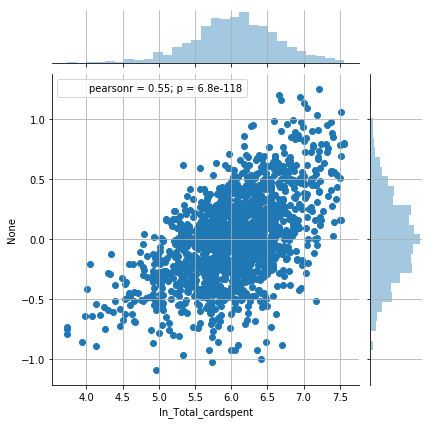

In [181]:
sns.jointplot(  test_y2, residuals2 )

C:\Users\sony\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


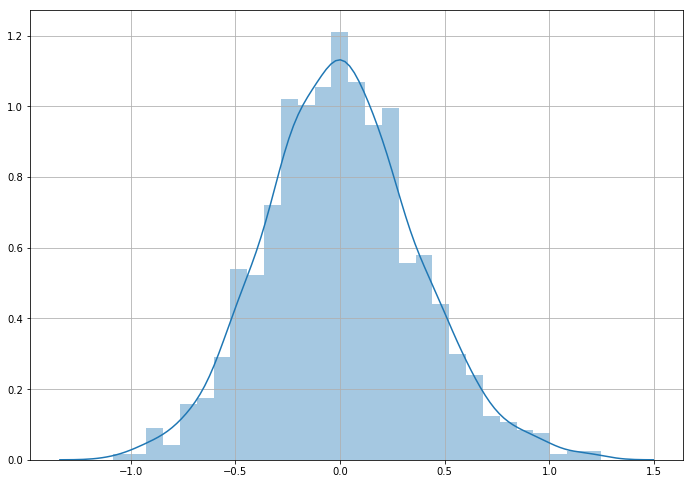

In [182]:
sns.distplot( residuals2 )

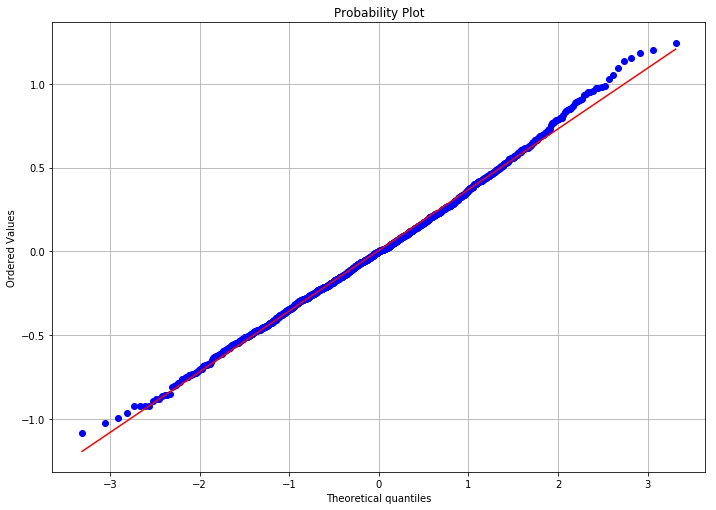

In [183]:
# To ensure residues are random i.e. normally distributed a Q-Q plot can be used
# Q-Q plot shows if the residuals are plotted along the line.
from scipy import stats
import pylab

stats.probplot( residuals2, dist="norm", plot=pylab )
pylab.show()

# Random Forest Model

In [184]:
from sklearn.ensemble import RandomForestRegressor

In [185]:
radm_reg = RandomForestRegressor(oob_score=True,n_estimators=100 )
radm_reg.fit( train_X2, train_y2 )

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [186]:
radm_test_pred = pd.DataFrame( { 'actual':  test_y2,
                            'predicted': radm_reg.predict( test_X2 ) } )

In [187]:
len(train_X2.columns)

70

In [188]:
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print 'MAE:', metrics.mean_absolute_error(radm_test_pred.actual, radm_test_pred.predicted)
print 'MSE:', metrics.mean_squared_error(radm_test_pred.actual, radm_test_pred.predicted)
print 'RMSE:', np.sqrt(metrics.mean_squared_error(radm_test_pred.actual, radm_test_pred.predicted))

MAE: 0.31946995153926905
MSE: 0.1620380851162605
RMSE: 0.40253954478567755


In [189]:
# Feature importance

In [190]:
indices = np.argsort(radm_reg.feature_importances_)[::-1]

In [191]:
indices = np.argsort(radm_reg.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_X2.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_X2.columns[indices[f]],
                         radm_reg.feature_importances_[indices[f]]]


In [192]:

sns.set(rc={'figure.figsize':(19.7,16.27)})

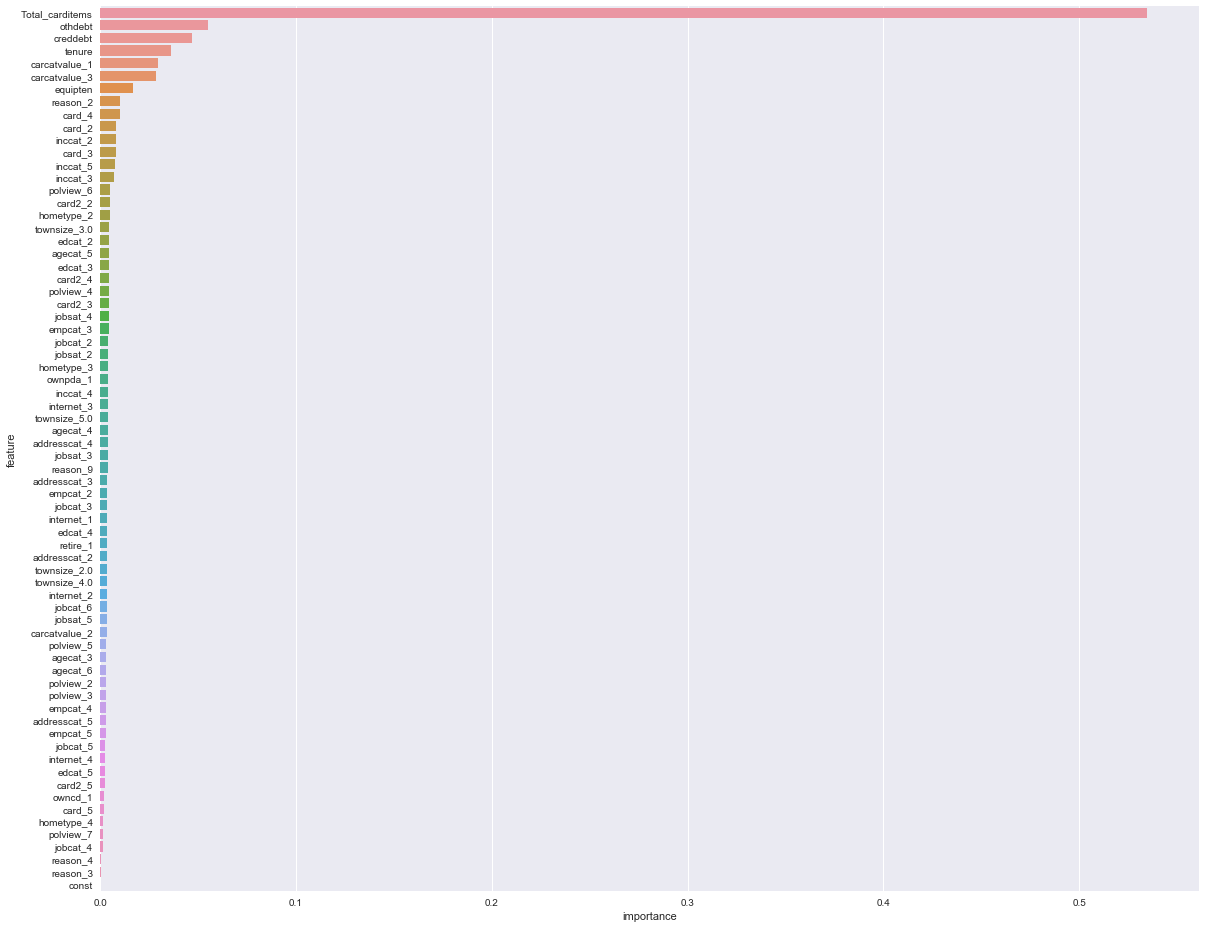

In [193]:
sns.barplot( y = 'feature', x = 'importance', data = feature_rank )

In [194]:
feature_rank.to_csv('fr.csv')

In [195]:
# ADABoosting

In [196]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

In [197]:
pargrid_ada = {'n_estimators': [25, 50, 75, 100, 200, 400, 600, 800],
               'learning_rate': [10 ** x for x in range(-3, 3)]}

In [198]:
from sklearn.grid_search import GridSearchCV
gscv_ada = GridSearchCV(estimator=AdaBoostRegressor(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)

C:\Users\sony\Anaconda2\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [199]:
gscv_ada.fit(train_X2, train_y2)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 233 out of 240 | elapsed:  4.1min remaining:    7.2s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  4.1min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [25, 50, 75, 100, 200, 400, 600, 800], 'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=True)

In [200]:
gscv_ada.best_params_

{'learning_rate': 1, 'n_estimators': 50}

In [201]:
reg_ada = gscv_ada.best_estimator_

In [202]:
gscv_ada.best_score_

0.589862708739032